## Dataset Description

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients  up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Questions for Analysis

1.  What is the Percentage of Attendance on Appointment Day ?
2.  What is the distribution of age ?
3.  Is SMS Received a factor that can affect show up or Not ?

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.5MB/s ta 0:00:011  6% |██                              | 645kB 11.9MB/s eta 0:00:01    10% |███▎                            | 1.1MB 8.6MB/s eta 0:00:02    14% |████▊                           | 1.5MB 9.2MB/s eta 0:00:01    54% |█████████████████▌              | 5.7MB 21.1MB/s eta 0:00:01    64% |████████████████████▌           | 6.7MB 19.3MB/s eta 0:00:01    92% |█████████████████████████████▌  | 9.6MB 20.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.1MB/s eta 0:00:01  1% |▋                               | 235kB 11.6MB/s eta 0:00:02    4% |█▋                              | 655kB 8.7MB/s eta 0:00:02    11% |███▉                            | 1.6MB 12.4MB/s eta 0:00:01    22% |███████                         | 3.0MB 9.4MB/s eta 0:00:02    25% |████████▏                       | 3.4MB 21.4MB/s eta 0:00:01    39% |████████████▊                   | 5.3MB 21.9MB/s eta 0:00:01    43% |██████████████                  |

# Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# check for the shape of the dataset
df.shape

(110527, 14)

This code was written to get the shape of the dataset, that is, how many colums and rolls are in the dataset. This tells how large the dataset is 

In [5]:
# check for the description of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here the cell tells the description of that dataset, the mean, the standard deviation of each column, etc.

In [6]:
# checking data at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The info command helps us to see if the number of null values the dataset, the datatype of each column.

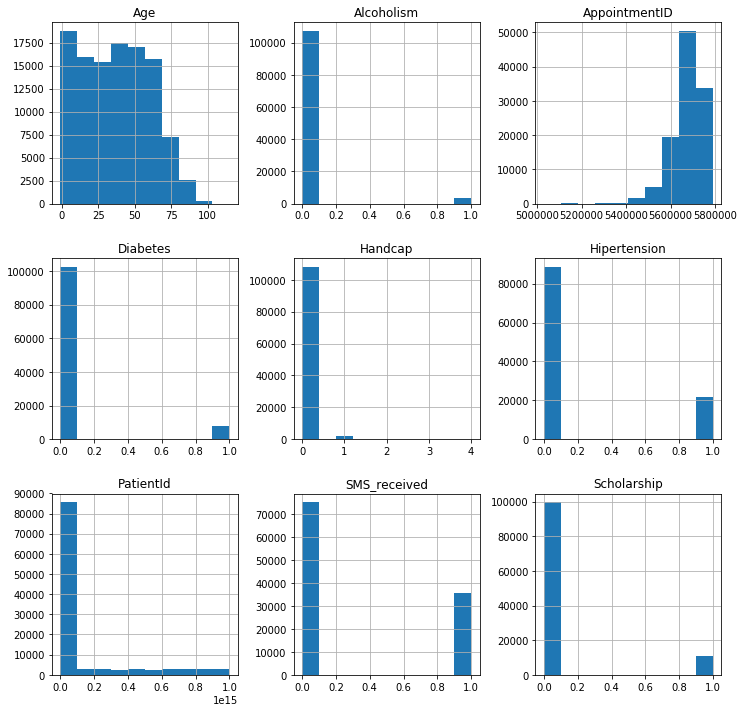

In [7]:
# checking the histogram of the dataset
df.hist(figsize=(12,12));

Viewing the all the dataset with histograms

# Data Cleaning

In [8]:
# renaming columns with wrong spelling
df=df.rename(columns = {'Hipertension' : 'Hypertension'})
df=df.rename(columns = {'Neighbourhood' : 'Hospital'})
df=df.rename(columns = {'Handcap': 'Handicap', 'SMS_received': 'SMS_Received'})


Here the rename function was used to rename the columns that needs corrections 

In [9]:
# dropping columns that will not be used for analysis
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hospital,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The drop function was use to drop columns that will not be used for the analysis

In [10]:
# changing the dataypes of the stated columns to the right datatype 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Hospital          110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_Received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


Here the datatype of the appointment day and scheduled day needed to change to datatime datatype

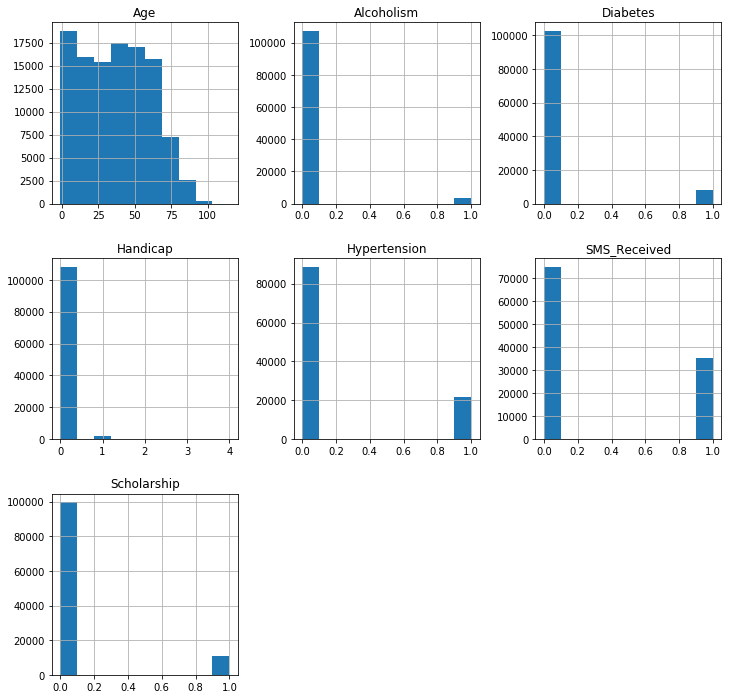

In [11]:
# histogram of the columns relevant
df.hist(figsize=(12,12));

Checking the histogram of the relevant columns that will be used

In [12]:
sum(df.duplicated())

635

The sum of the duplicated vcalues in the dataset

In [13]:
# encoding the dependant variable to binary for better analysis
dummy = pd.get_dummies(df['No-show'])
dummy.drop('Yes', axis = 1, inplace = True)
df.drop('No-show', axis = 1, inplace= True)
df = df.join(dummy)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hospital,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


For better and easy analysis the dependent variable is in object datatype and it needed to be changed to binary

In [14]:
# Renaming the dependant column
df.rename(columns = {'No' : 'Present'}, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hospital,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Present
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


Renaming the dependent column for better understanding 

### Research Question 1 What is the Percentage of Attendance on Appointment Day ?

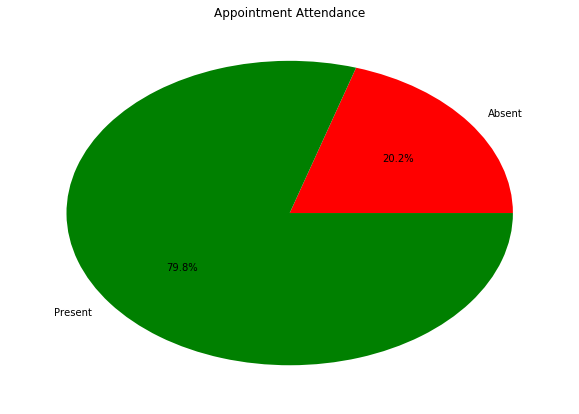

In [15]:
fig,ax=plt.subplots(figsize=(10,7))
chart = [len(df[df['Present']==0]), len(df[df['Present']==1])]
plt.pie(chart, autopct='%1.1f%%',colors=['Red', 'Green'], labels=['Absent', 'Present'])
plt.title('Appointment Attendance')
plt.show()

We can see from the above piechart that approximately **20%** of the patients did not show up at the hospital for their appointment and approximately **80%** of patients show up for their appointment

### Research Question 2  What is the Distribution of Age ?

In [16]:
present = df.Present == True
absent = df.Present == False
df.Age[present].mean()

37.790064393252315

In [17]:
df.Age[absent].mean()

34.31766656212196

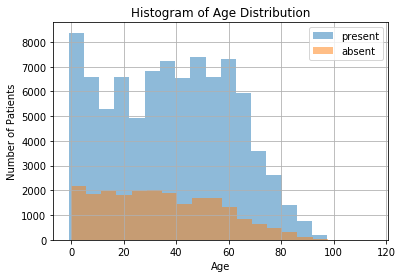

In [18]:
df.Age[present].hist(alpha=0.5, bins=20, label='present')
df.Age[absent].hist(alpha=0.5, bins=20, label='absent')
plt.legend();
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Histogram of Age Distribution')
plt.grid(True)

From the histogram above we can see the distribution of age for both present and absent patients, that is, age group of patients that were more in population to show up for their appointment and  the age group with more population that were absent. **0-10** and **50-60** have more than **8000** patients that were present for their appointment 

### Research Question 3: Is SMS Received a factor that can affect show up or Not? 

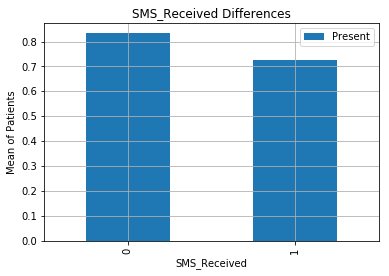

In [19]:
df.groupby('SMS_Received').Present.mean().plot(kind= 'bar');
df.SMS_Received.value_counts();
plt.legend();
plt.ylabel('Mean of Patients')
plt.title('SMS_Received Differences')
plt.grid(True)

From the barchart above we can see that SMS Received did not have much effect on if patients will show up for their appointment or not because we can see that those that did not receive a reminder SMS show up in the hospital for their appointment than those that got the reminder SMS

# Conclusion

### Findings
1. We found from the exploratory analysis that there are 80% of patients showed up for their appointments and 20% did not show up
2. We found out that the Age interval of 0-10 and 50-60 were the most populous patients to show up for their appointments
3. we could also see from the analysis that SMS reminder does not have much influence on the patients, because those that did not get SMS reminders showed up than those that got reminders.

### Limitations

1. This analysis did not work on the gender aspect of the data set 
2. This analysis did not make use of the hospital column for analysis 


In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0